# Assignment5


## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

### Tasks

1. Find the linear regression equation for this data.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)
4. Extrapolate data:  If the ground temperature reached 95, then at what approximate rate would you expect the crickets to be chirping?
5. Interpolate data:  With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second.  What was the approximate ground temperature that morning? 

##**Import the all required libraries**

In [44]:
from sklearn import linear_model
import itertools as it
import numpy as np
import pandas as pd

from copy import deepcopy
%matplotlib inline

import pandas as pd # handle the data
from sklearn.model_selection import train_test_split # split the data

from sklearn import metrics # evaluation metrics
import seaborn as sn # plotting the data
import matplotlib.pyplot as plt # plotting the data

In [4]:
ground_cricket_data = {"Chirps/Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Chirps/Second       15 non-null     float64
 1   Ground Temperature  15 non-null     float64
dtypes: float64(2)
memory usage: 368.0 bytes


In [14]:
df.dtypes

Chirps/Second         float64
Ground Temperature    float64
dtype: object

In [15]:
df.isnull().sum()

Chirps/Second         0
Ground Temperature    0
dtype: int64

In [16]:
df.shape

(15, 2)

In [17]:
df.describe()

,Chirps/Second,Ground Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


In [18]:
def outlierpresence(df):
  for i in df.keys():
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    x = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)] #IT WILL GIVE ALL OUTLIERS IN THE DATAFRAME WITH ALL COLUMNS
    if True in y[i].tolist(): #HERE WE CHECK True is in the list of particular column
      print('Outliers are', '\033[1m'+ 'present' +'\033[0m', 'in the data of','\033[1m' + i + '\033[0m')
      print('-------------------------------')
    else:
      print('Outliers are', '\033[1m'+ ' not present in the data of' +'\033[0m', 'in','\033[1m' + i + '\033[0m') 
      print('-------------------------------') 
outlierpresence(df)

Outliers are present in the data of Chirps/Second
-------------------------------
Outliers are  not present in the data of in Ground Temperature
-------------------------------


###**Print upper and lower whiskers**

In [19]:
def loweruppwhisker(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    print('\033[1m' + i + '\033[0m')
    print('-------------------------')
    print("Lowe whisker: ",lower_whisker)
    print("Upper whisker: ", upper_whisker)
    print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
loweruppwhisker(df)

Chirps/Second
-------------------------
Lowe whisker:  12.9
Upper whisker:  19.699999999999996
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
Ground Temperature
-------------------------
Lowe whisker:  58.400000000000006
Upper whisker:  98.4
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


###**Outlier values over the dataset**

In [20]:
def outliervalues(df):
  for i in df.keys():
    Q1 = df[i].quantile(0.25)
    Q3 = df[i].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    x = ((df[i] < Q1 - whisker_width*IQR) | (df[i] > Q3 + whisker_width*IQR))
    x = pd.DataFrame(x) # convert to data frame
    # df[x.isin([True])]
    substring = 'True'
    y= x[x.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(), axis=1)]
    if True in y[i].tolist(): 
      print('\033[1m' + i + '\033[0m')
      print('-------------------------')
      # print(y[i]) 
      index = y.index
      print(df[i].iloc[index])
      print("Total number of Outlers in",i,"is: ",len(index))
      print("%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%")
outliervalues(df)

Chirps/Second
-------------------------
0    20.0
2    19.8
Name: Chirps/Second, dtype: float64
Total number of Outlers in Chirps/Second is:  2
%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%


### In `Chirps/Second' we has two outliers 20 and 19.8 in the 1st and 3rd rows respectively.
###Here we have 2 outliers only. so we can go with the dataset.

In [22]:
print(f'Linear Regression Equation: y = {regr_gc.coef_[0]:.3f} * x + {regr_gc.intercept_:.3f}')

Linear Regression Equation: y = 0.203 * x + 0.459


###CHART


---


The original data and the equation on the chart.

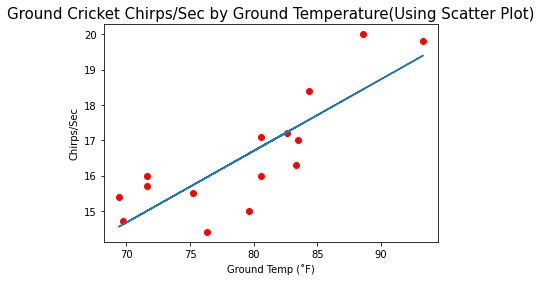

In [23]:
plt.scatter(ground_temp, chirps_sec, color='red')
plt.plot(ground_temp, regr_gc.predict(ground_temp))
plt.title('Ground Cricket Chirps/Sec by Ground Temperature(Using Scatter Plot)',fontsize=15)
plt.xlabel('Ground Temp (˚F)')
plt.ylabel('Chirps/Sec')
plt.show()

In [26]:
df.corr()

,Chirps/Second,Ground Temperature
Chirps/Second,1.000000,0.832042
Ground Temperature,0.832042,1.000000


### Between both data sets, we had good correlation coefficient with 0.832. So, we can apply linear regression here.
### Here we have no transformation required.

##Find the linear regression equation for this data.

---



In [32]:
x = df['Chirps/Second'].to_frame()
y = df['Ground Temperature']

In [33]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(x) 
x = scaler.transform(x)

In [34]:
regr_gc = linear_model.LinearRegression()
regr_gc.fit(x,y)

LinearRegression()

In [36]:
print(regr_gc.intercept_)
print(regr_gc.coef_) 
print(regr_gc.predict([[15]]))

79.34666666666665
[5.64325739]
[163.99552758]


Text(0, 0.5, 'Ground Temperature')

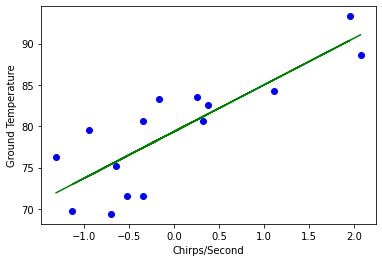

In [42]:
plt.scatter(x, y, color='blue')
plt.plot(x, regr_gc.predict(x), color='green')
plt.xlabel('Chirps/Second')
plt.ylabel('Ground Temperature')

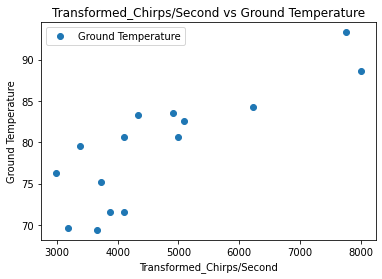

,Transformed_Chirps/Second,Ground Temperature
Transformed_Chirps/Second,1.000000,0.830651
Ground Temperature,0.830651,1.000000


In [45]:
df['Transformed_Chirps/Second'] = np.power(df['Chirps/Second'],3) # transformation of x to log(x)
df.plot(x='Transformed_Chirps/Second', y='Ground Temperature', style='o')
plt.title('Transformed_Chirps/Second vs Ground Temperature')
plt.xlabel('Transformed_Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()
df[['Transformed_Chirps/Second','Ground Temperature']].corr()

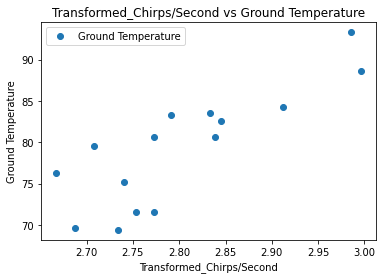

,Transformed_Chirps/Second,Ground Temperature
Transformed_Chirps/Second,1.000000,0.829254
Ground Temperature,0.829254,1.000000


In [48]:
df['Transformed_Chirps/Second'] = np.log(df['Chirps/Second']) # transformation of x to log(x)
df.plot(x='Transformed_Chirps/Second', y='Ground Temperature', style='o')
plt.title('Transformed_Chirps/Second vs Ground Temperature')
plt.xlabel('Transformed_Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()
df[['Transformed_Chirps/Second','Ground Temperature']].corr()

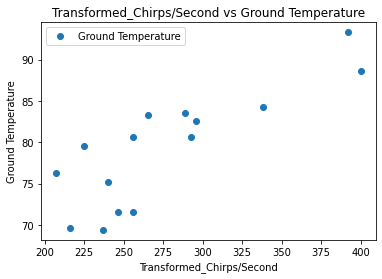

,Transformed_Chirps/Second,Ground Temperature
Transformed_Chirps/Second,1.000000,0.832446
Ground Temperature,0.832446,1.000000


In [49]:
df['Transformed_Chirps/Second'] = np.square(df['Chirps/Second']) # transformation of x to log(x)
df.plot(x='Transformed_Chirps/Second', y='Ground Temperature', style='o')
plt.title('Transformed_Chirps/Second vs Ground Temperature')
plt.xlabel('Transformed_Chirps/Second')
plt.ylabel('Ground Temperature')
plt.show()
df[['Transformed_Chirps/Second','Ground Temperature']].corr()

In [50]:
y_pred = regr_gc.predict(x) 
"Syntax : varName.predict(test_features)"
pd.DataFrame(y_pred)

,0
0,91.055442
1,77.414150
2,90.373378
3,85.598925
4,81.165506
5,75.708989
6,72.980730
7,76.391053
8,75.367957
9,78.437247


In [51]:
df1 = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
df1

,Actual,Predicted
0,88.6,91.055442
1,71.6,77.414150
2,93.3,90.373378
3,84.3,85.598925
4,80.6,81.165506
5,75.2,75.708989
6,69.7,72.980730
7,71.6,76.391053
8,69.4,75.367957
9,83.3,78.437247


In [52]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y,y_pred))

R2- SCORE: 0.6922946529147003


##Extrapolate data: If the ground temperature reached 95

In [57]:
print(f'At 95˚F, our approximation of chirps/sec is: {regr_gc.predict([[95]])}\n')

At 95˚F, our approximation of chirps/sec is: [615.45611913]



##Interpolate data:


---

With a listening device, you discovered that on a particular morning the crickets were chirping at a rate of 18 chirps per second

In [61]:
(18 - regr_gc.intercept_ ) / regr_gc.coef_

array([-10.87079011])

In [58]:
def chirps_to_temp(y):
    ret = (y - regr_gc.intercept_) / regr_gc.coef_[0]
    print(f'With an observation of {y} chirps/sec, we expect a ground temp of {(ret):.2f}˚F')

chirps_to_temp(18)

With an observation of 18 chirps/sec, we expect a ground temp of -10.87˚F


# Assignment6

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

### Tasks

1. Find the linear regression equation for this data for brain weight to body weight.
2. Chart the original data and the equation on the chart.
3. Find the equation's $R^2$ score (use the `.score` method) to determine whether the
equation is a good fit for this data. (0.8 and greater is considered a strong correlation.)

In [113]:
df = pd.read_fwf("https://raw.githubusercontent.com/JOHANDILEEP21/Datasets/main/brain_body.txt")
df

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5
...,...,...
57,160.000,169.0
58,0.900,2.6
59,1.620,11.4
60,0.104,2.5


In [114]:
df.isnull().sum()

Brain    0
Body     0
dtype: int64

In [115]:
df.dtypes

Brain    float64
Body     float64
dtype: object

In [116]:
df = df.drop_duplicates()

In [117]:
df.shape

(62, 2)

In [119]:
regr_bb = linear_model.LinearRegression()
body = df[['Body']]
brain = df['Brain']
regr_bb.fit(body, brain)

LinearRegression()

In [121]:
print(f'Linear Regression Equation: y = {regr_bb.coef_[0]:.4f} * x + {regr_bb.intercept_:.4f}', )

Linear Regression Equation: y = 0.9029 * x + -56.8555


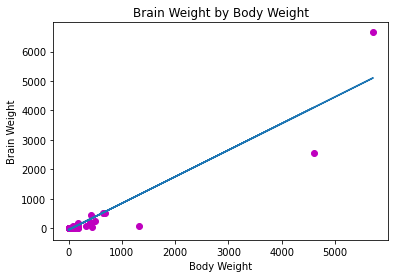

In [122]:
plt.scatter(body, brain, color='m')
plt.plot(body, regr_bb.predict(body))
plt.title('Brain Weight by Body Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [123]:
print(f'R^2 score for this equation: {regr_bb.score(body, brain):.4f}')

R^2 score for this equation: 0.8727


##**This score is greater than 0.8, so it is a good fit for this data.**

# Assignment7

## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

### Tasks

1. Find the linear regression equation for this data using columns 1-5 to column 6.
2. Find the selection of columns with the best $R^2$ score.
3. Report whether sex is a factor in salary.

In [124]:
import pandas as pd
df = pd.read_fwf("https://raw.githubusercontent.com/JOHANDILEEP21/Datasets/main/salary.txt", header=None, names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [125]:
df.dtypes

Sex       int64
Rank      int64
Year      int64
Degree    int64
YSdeg     int64
Salary    int64
dtype: object

In [126]:
df.isnull().sum()

Sex       0
Rank      0
Year      0
Degree    0
YSdeg     0
Salary    0
dtype: int64

In [127]:
df = df.drop_duplicates()

In [128]:
df.shape

(52, 6)

##Tasks

---

Find the linear regression equation for this data using columns 1-5 to column 6.

##Salary Discrimination, Task 2 Conclusion


---


The selection with the best  score is: Sex, Rank, Year, Degree, YSdeg: 0.85(as seen above)

However, although including all of the columns produces the highest  score, there are two dominant factors: Year and Rank. Just these two factors taken together have a score of 0.84.

In [129]:
salary_discrim_cols = ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg']

In [130]:
def lin_reg_eq_print(salary_discrim_cols, df):
    input_cols = df[salary_discrim_cols]

    salary = df['Salary']
    
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, salary)
    
    print(f'The equation for columns {salary_discrim_cols} with respect to Salary:\n{regr_sd.coef_} + {regr_sd.intercept_}')

In [131]:
lin_reg_eq_print(salary_discrim_cols, df)

The equation for columns ['Sex', 'Rank', 'Year', 'Degree', 'YSdeg'] with respect to Salary:
[ 1241.7924996   5586.18144952   482.85976783 -1331.64406341
  -128.79057354] + 11410.14654725559


##Tasks

---

Find the selection of columns with the best  R2  score.

In [132]:
def lin_reg_wrt_focus(salary_discrim_cols, df, focus='Salary'):
    input_cols = df[salary_discrim_cols]

    focus_output = df[focus]
    
    regr_sd = linear_model.LinearRegression()
    regr_sd.fit(input_cols, focus_output)
    
    return regr_sd.score(input_cols, focus_output)


print(f'R^2 score for equation using all columns: {lin_reg_wrt_focus(salary_discrim_cols, df):.3f}')

R^2 score for equation using all columns: 0.855


In [133]:
def get_combos(cols):
    return [it.combinations(cols, n + 1) for n in range(len(cols))]

combos = get_combos(salary_discrim_cols)


In [134]:
def all_combo_scores(combos, df, focus='Salary'):
    combo_scores = {}
    for m in range(len(list(combos))):
        for n in list(combos[m]):
            combo_scores[lin_reg_wrt_focus(list(n), df, focus)] = n
    return combo_scores

combo_scores = all_combo_scores(combos, df)
sorted(combo_scores.items(), key=lambda c: c[0], reverse=True)


[(0.8547180674410969, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8490366192262851, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.8485077204335426, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.8456725764485596, ('Rank', 'Year', 'YSdeg')),
 (0.845547641297936, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.8454319861987166, ('Sex', 'Rank', 'Year')),
 (0.8437395200874137, ('Rank', 'Year', 'Degree')),
 (0.8436480933264597, ('Rank', 'Year')),
 (0.7671813414350668, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7666122610227071, ('Sex', 'Rank', 'YSdeg')),
 (0.7625149185326454, ('Rank', 'Degree', 'YSdeg')),
 (0.7623948189698249, ('Rank', 'YSdeg')),
 (0.7583144768153613, ('Sex', 'Rank', 'Degree')),
 (0.7557961688386643, ('Rank', 'Degree')),
 (0.7554917749443394, ('Sex', 'Rank')),
 (0.7525360539274633, ('Rank',)),
 (0.6311597502907436, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6236261611533503, ('Year', 'Degree', 'YSdeg')),
 (0.5832708257660315, ('Sex', 'Degree', 'YSdeg')),
 (0.5808063918180405, ('Sex', 'Year', 

In [135]:
print(len(combo_scores))

31


##Salary Discrimination, Task 3


---


It is worth noting that Sex on its own has a score very close to zero (0.063), indicating that it has no direct influence on salary.

In [137]:
num_by_sex = df.Sex.value_counts()
print(f'Num men: {num_by_sex[0]}\nNum women: {num_by_sex[1]}')

Num men: 38
Num women: 14


#Salary Discrimination Conclusion


---


###-->Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. There is no salary discrimination by Sex.



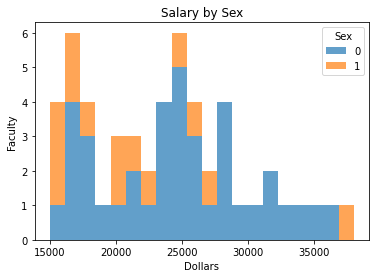

In [138]:
df.pivot_table(index=df.index, columns='Sex', values='Salary').plot(kind='hist', alpha=0.7, stacked=True, bins=20, title='Salary by Sex')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

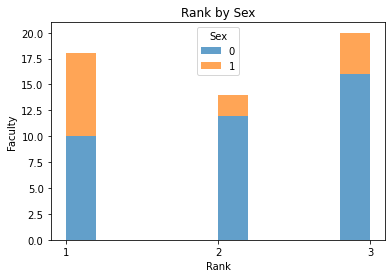

In [139]:
df.pivot_table(index=df.index, columns='Sex', values='Rank').plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex')
plt.xticks([1, 2, 3])
plt.xlabel('Rank')
plt.ylabel('Faculty')
plt.show()


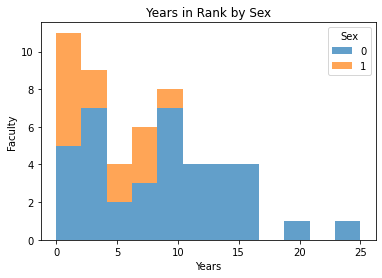

In [140]:
df.pivot_table(index=df.index, columns='Sex', values='Year').plot(kind='hist', alpha=0.7, stacked=True, bins=12,title='Years in Rank by Sex')
plt.xlabel('Years')
plt.ylabel('Faculty')
plt.show()


The women at this university have only been at their present rank for at most 10 years; let's compare with the men who have a similar number of years.

##Comparing Men and Women with Similar Number of Years

In [141]:
df_10 = df[df['Year'] <= 10]

In [142]:
combos_10 = get_combos(salary_discrim_cols)
combo_10_scores = all_combo_scores(combos_10, df_10)
sorted(combo_10_scores.items(), key=lambda c: c[0], reverse=True)

[(0.7968248819660304, ('Sex', 'Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7872092866034841, ('Sex', 'Rank', 'Year', 'YSdeg')),
 (0.7857914167129874, ('Rank', 'Year', 'Degree', 'YSdeg')),
 (0.7812953737007232, ('Rank', 'Year', 'YSdeg')),
 (0.7811304025138202, ('Sex', 'Rank', 'Year', 'Degree')),
 (0.7809344717080977, ('Sex', 'Rank', 'Year')),
 (0.7783076155381674, ('Rank', 'Year', 'Degree')),
 (0.778125545829645, ('Rank', 'Year')),
 (0.7267866959953191, ('Sex', 'Rank', 'Degree', 'YSdeg')),
 (0.7266289950954575, ('Sex', 'Rank', 'Degree')),
 (0.7263171650507368, ('Rank', 'Degree', 'YSdeg')),
 (0.7262952984826756, ('Rank', 'Degree')),
 (0.7237917566538923, ('Sex', 'Rank', 'YSdeg')),
 (0.7237599305119999, ('Rank', 'YSdeg')),
 (0.7224004990910746, ('Sex', 'Rank')),
 (0.7221603677648399, ('Rank',)),
 (0.5211388967522836, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.5106317178170396, ('Year', 'Degree', 'YSdeg')),
 (0.47582422204482044, ('Sex', 'Degree', 'YSdeg')),
 (0.46515893607776626, ('Sex', 'Year'

In [143]:
print(len(combo_10_scores))

31


###Salary Discrimination :-

---


Again, we see that Sex has no direct influence on Salary: score of 0.0068777005613497311.

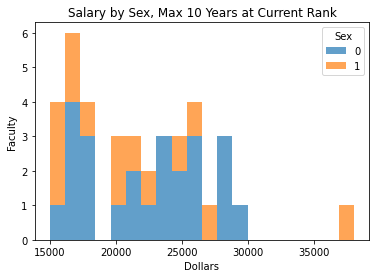

In [144]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Salary').plot(kind='hist', alpha=0.7, stacked=True, bins=20,title='Salary by Sex, Max 10 Years at Current Rank')
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

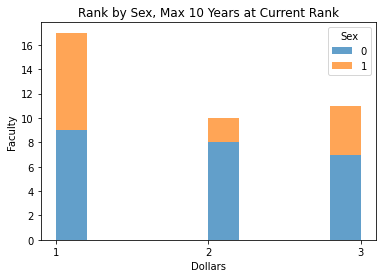

In [145]:
df_10.pivot_table(index=df_10.index, columns='Sex', values='Rank').plot(kind='hist', alpha=0.7, stacked=True, title='Rank by Sex, Max 10 Years at Current Rank')
plt.xticks([1,2,3])
plt.xlabel('Dollars')
plt.ylabel('Faculty')
plt.show()

The data show that there is no direct salary discrimination by sex; however, we should investigate the single largest influencer of salary—Rank.

In [146]:
rank_discrim_cols = ['Sex', 'Year', 'Degree', 'YSdeg']
combos_rank = get_combos(rank_discrim_cols)
combo_rank_scores = all_combo_scores(combos_rank, df_10, 'Rank')
sorted(combo_rank_scores.items(), key=lambda c: c[0], reverse=True)

[(0.6684776318082726, ('Sex', 'Year', 'Degree', 'YSdeg')),
 (0.6650836168279376, ('Sex', 'Degree', 'YSdeg')),
 (0.6123237979933462, ('Year', 'Degree', 'YSdeg')),
 (0.6121040013037697, ('Degree', 'YSdeg')),
 (0.5169568608935469, ('Sex', 'Year', 'YSdeg')),
 (0.5169178279759162, ('Sex', 'YSdeg')),
 (0.4848731472423391, ('Year', 'YSdeg')),
 (0.48257642674080226, ('YSdeg',)),
 (0.17754355818252243, ('Sex', 'Year', 'Degree')),
 (0.17641648396278564, ('Sex', 'Year')),
 (0.1761306214861189, ('Year', 'Degree')),
 (0.17502353196257248, ('Year',)),
 (0.016344674690073613, ('Sex', 'Degree')),
 (0.013387066889012145, ('Sex',)),
 (0.0036042103162727823, ('Degree',))]

###Salary Discrimination :-

---


Even looking at the influencers of Rank, looking only at those who have been at their present rank for 10 years or less, there is no correlation with Sex. There is no salary discrimination by Sex.